# Long Short-Term Memory (LSTM) Using Darts

## What is LSTM? 

Darts is a python time series forcasting library, we wanted to see what it can do with its implementation of lstm. How much does it differ from ours? Is it better or worse?  what about trainning time?

## Darts LSTM Implementation:

# TODO: change this
Our implementation of the LSTM is available in `./src/lstm.py`. The implementation includes the model as well as all that's needed for the test besnch to be able to use the model. let's check it out:

In [1]:
import darts
from darts.models import BlockRNNModel
from pytorch_lightning.callbacks import EarlyStopping
from torchmetrics import MeanAbsolutePercentageError

C:\Users\Andrew\miniconda3\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
class DartsLSTMTester:
    def __init__(self, longest_length_to_predict, shortest_input):
        # Early stop callback
        my_stopper = EarlyStopping(
            monitor="train_MeanAbsolutePercentageError",  # "val_loss",
            patience=5,
            min_delta=0.05,
            mode='min',
        )
        pl_trainer_kwargs = {"callbacks": [my_stopper]}
        self.model = BlockRNNModel(
            model="LSTM",
            input_chunk_length=shortest_input,
            output_chunk_length=shortest_input,
            n_epochs=500,
            torch_metrics=MeanAbsolutePercentageError(),
            pl_trainer_kwargs=pl_trainer_kwargs
        )

    def learn_from_data_set(self, training_data_set):
        list_of_np_array = [ts_as_df["sample"].to_numpy() for ts_as_df in training_data_set]
        list_of_series = [
            darts.timeseries.TimeSeries.from_values(arr)
            for arr in list_of_np_array
        ]
        self.model.fit(list_of_series)

    def predict(self, ts_as_df_start, how_much_to_predict):
        series = darts.timeseries.TimeSeries.from_dataframe(ts_as_df_start, time_col="time", value_cols="sample")
        res = self.model.predict(n=how_much_to_predict, series=series)
        assert len(res) == how_much_to_predict
        res_np_arr = res.pd_series().to_numpy()
        return res_np_arr
    

[TEST BENCH] Powering on test bench
[TEST BENCH] testing metric='node_mem', app='moc/smaug'.
[TEST BENCH] Fetching data for metric='node_mem', app='moc/smaug'.
[TEST BENCH] Subsampling data from 1 sample per 1 minute to 1 sample per 5 minutes.


2022-07-14 20:16:09 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 29488 samples.
2022-07-14 20:16:09 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-14 20:16:09 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-14 20:16:09 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-14 20:16:09 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-14 20:16:09 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-14 20:16:09 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | LSTM             | 2.8 K 


[TEST BENCH] Throwing out data that is less than 500 minutes long.
[TEST BENCH] Scaling data.
[TEST BENCH] Splitting data into train and test
[TEST BENCH] Amount of train data is 76
[TEST BENCH] Amount of test data is 18
[TEST BENCH] Making an instance of the class we want to test
[TEST BENCH] Starting training loop
Epoch 6: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 922/922 [00:28<00:00, 32.56it/s, loss=0.00263, train_loss=0.000983, train_MeanAbsolutePercentageError=0.356]
[TEST BENCH] Training took 181.9078323841095 seconds.
[TEST BENCH] Starting testing loop
Predicting DataLoader 0: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, -83319.76it/s]


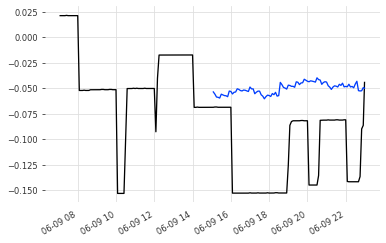

Predicting DataLoader 0: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, -88461.89it/s]


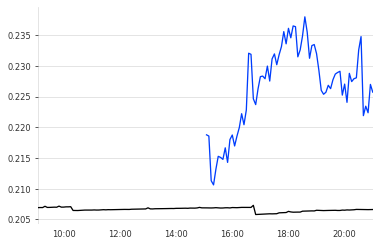

Predicting DataLoader 0: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, -92168.21it/s]


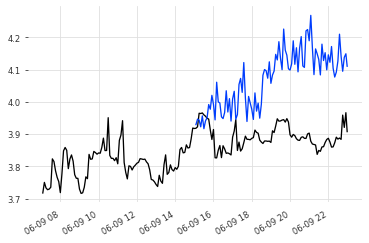

Predicting DataLoader 0: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, -45846.73it/s]


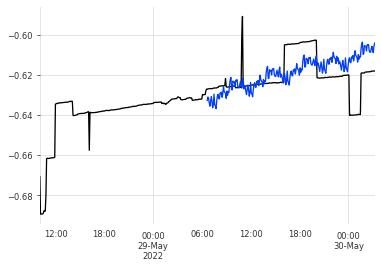

Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, -236280.75it/s]


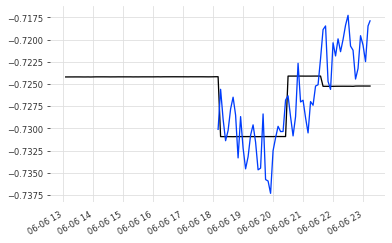

Predicting DataLoader 0: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, -88858.69it/s]


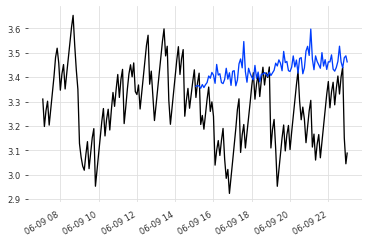

Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, -141401.73it/s]


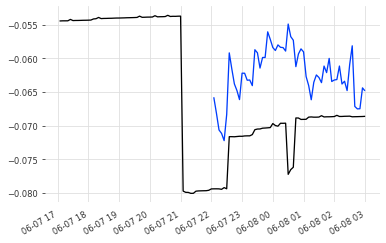

Predicting DataLoader 0: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, -53399.97it/s]


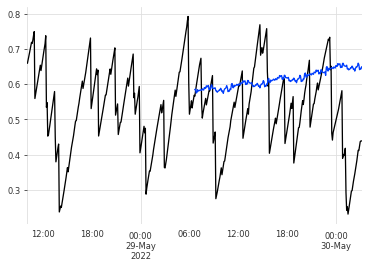

Predicting DataLoader 0: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, -55282.20it/s]


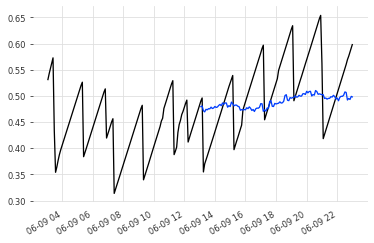

Predicting DataLoader 0: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, -93364.45it/s]


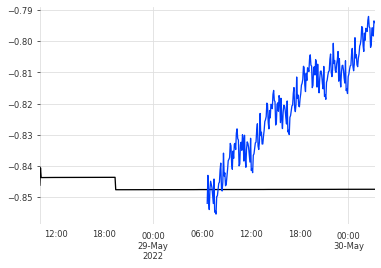

Predicting DataLoader 0: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, -91513.17it/s]
[TEST BENCH] ***********************************************************************
[TEST BENCH] REPORT for                              metric='node_mem', app='moc/smaug':
[TEST BENCH] Training time in seconds is             181.9078323841095
[TEST BENCH] Average mse over the test set is        0.008192443413000385
[TEST BENCH] Average precision over the test set is  0.7225761476792978
[TEST BENCH] Average recall over the test set is     0.5049067969296486
[TEST BENCH] Average F1 over the test set is         0.587263635507496
[TEST BENCH] ***********************************************************************
[TEST BENCH] Done with metric='node_mem', app='moc/smaug'
[TEST BENCH] testing metric='node_mem', app='emea/balrog'.
[TEST BENCH] Fetching data for metric='node

2022-07-14 20:19:13 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 2904 samples.
2022-07-14 20:19:13 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-14 20:19:13 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-14 20:19:13 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-14 20:19:13 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-14 20:19:13 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-14 20:19:13 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | LSTM             | 2.8 K 
4

[TEST BENCH] Throwing out data that is less than 500 minutes long.
[TEST BENCH] Scaling data.
[TEST BENCH] Splitting data into train and test
[TEST BENCH] Amount of train data is 24
[TEST BENCH] Amount of test data is 6
[TEST BENCH] Making an instance of the class we want to test
[TEST BENCH] Starting training loop
Epoch 9: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 91/91 [00:02<00:00, 33.01it/s, loss=0.000825, train_loss=0.000561, train_MeanAbsolutePercentageError=1.420]
[TEST BENCH] Training took 26.91833186149597 seconds.
[TEST BENCH] Starting testing loop
Predicting DataLoader 0: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, -9998.87it/s]


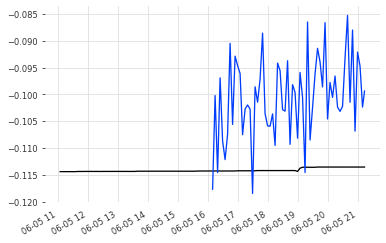

Predicting DataLoader 0: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, -10012.13it/s]


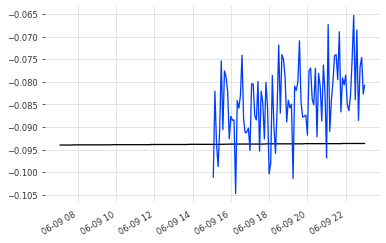

Predicting DataLoader 0: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, -10005.23it/s]


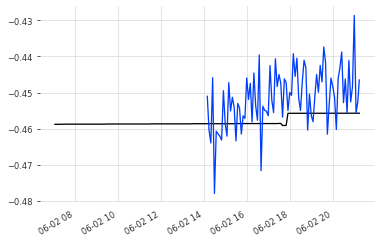

Predicting DataLoader 0: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, -9990.14it/s]


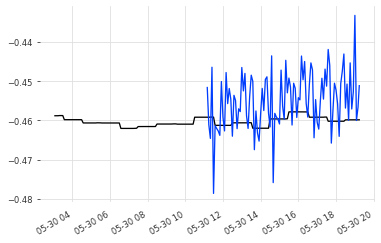

Predicting DataLoader 0: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, -9987.76it/s]


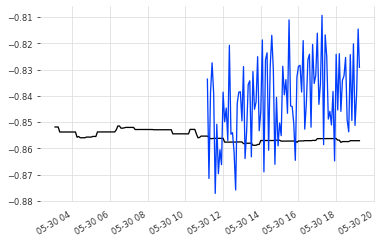

Predicting DataLoader 0: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, -8177.27it/s]


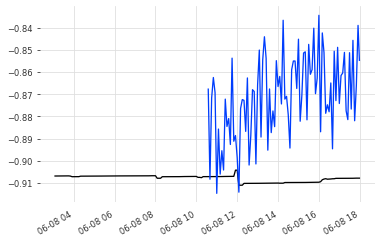

[TEST BENCH] ***********************************************************************
[TEST BENCH] REPORT for                              metric='node_mem', app='emea/balrog':
[TEST BENCH] Training time in seconds is             26.91833186149597
[TEST BENCH] Average mse over the test set is        0.0004702360852949473
[TEST BENCH] Average precision over the test set is  0.8474145425822627
[TEST BENCH] Average recall over the test set is     0.5128000234164617
[TEST BENCH] Average F1 over the test set is         0.6373054825592401
[TEST BENCH] ***********************************************************************
[TEST BENCH] Done with metric='node_mem', app='emea/balrog'
[TEST BENCH] testing metric='container_mem', app='nmstate-handler'.
[TEST BENCH] Fetching data for metric='container_mem', app='nmstate-handler'.
[TEST BENCH] Subsampling data from 1 sample per 1 minute to 1 sample per 5 minutes.
[TEST BENCH] Throwing out data that is less than 500 minutes long.
[TEST BENCH] Scaling

2022-07-14 20:20:21 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 641457 samples.
2022-07-14 20:20:21 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-14 20:20:21 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-14 20:20:21 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-14 20:20:21 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-14 20:20:21 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-14 20:20:21 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | LSTM             | 2.8 K 

Epoch 0:  30%|█████████████████████████████████████████▎                                                                                                 | 5965/20046 [02:43<06:26, 36.42it/s, loss=0.836, train_loss=0.811]

In [ ]:
import src.test_bench
tb = src.test_bench.TestBench(
    class_to_test=DartsLSTMTester,
    path_to_data="./data/"
)
tb.run_training_and_tests()